In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\DDoS_dataset.csv')
df = data.copy()
df.head()

,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,ARP,UDP,1,192.168.1.1,0,0,60,92.8,1
1,ARP,UDP,0,192.168.1.10,0,0,42,92.9,0
2,ARP,UDP,1,192.168.1.1,0,0,60,362.8,1
3,ARP,UDP,0,192.168.1.12,0,0,42,362.8,0
4,ARP,UDP,1,192.168.1.1,0,0,60,364.3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852585 entries, 0 to 852584
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Highest Layer    852585 non-null  object 
 1   Transport Layer  852585 non-null  object 
 2   Source IP        852585 non-null  int64  
 3   Dest IP          852585 non-null  object 
 4   Source Port      852585 non-null  int64  
 5   Dest Port        852585 non-null  int64  
 6   Packet Length    852585 non-null  int64  
 7   Packets/Time     852585 non-null  float64
 8   target           852585 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 58.5+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source IP,852585.0,0.466506,0.498877,0.0,0.0,0.0,1.0,1.0
Source Port,852585.0,48986.260599,13175.856007,0.0,49158.0,49158.0,50890.0,65530.0
Dest Port,852585.0,4163.623361,8453.836606,0.0,80.0,5201.0,5201.0,50890.0
Packet Length,852585.0,770.617703,714.423026,42.0,60.0,342.0,1514.0,1514.0
Packets/Time,852585.0,192.782676,143.208412,0.0,28.9,217.9,281.9,484.4
target,852585.0,0.466506,0.498877,0.0,0.0,0.0,1.0,1.0


In [5]:
df.isnull().sum()

Highest Layer      0
Transport Layer    0
Source IP          0
Dest IP            0
Source Port        0
Dest Port          0
Packet Length      0
Packets/Time       0
target             0
dtype: int64

In [6]:
color_palette = px.colors.qualitative.Pastel

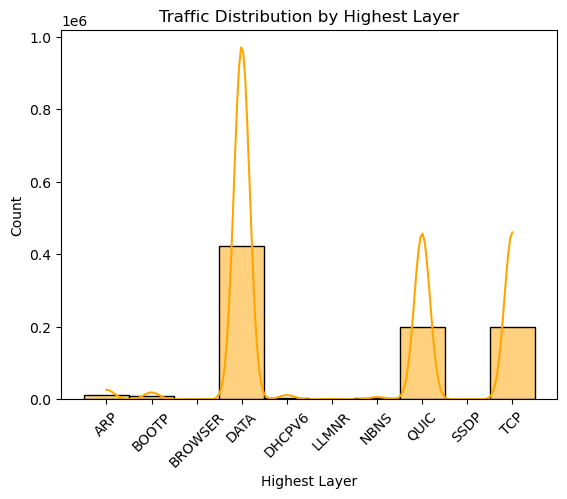

In [7]:
sns.histplot(x='Highest Layer', data=df, kde=True, color='orange')
plt.title('Traffic Distribution by Highest Layer')
plt.xticks(rotation=45)
plt.show()

In [8]:
fig = px.box(df, x='Transport Layer', y='Packet Length', title='Packet Length Distribution by Transport Layer')
fig.update_layout(width=600, height=400)
fig.show(renderer='iframe')

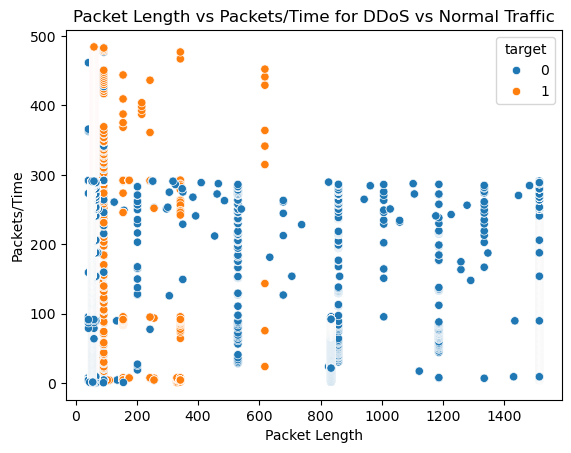

In [9]:
sns.scatterplot(x='Packet Length', y='Packets/Time', hue='target', data=df)
plt.title('Packet Length vs Packets/Time for DDoS vs Normal Traffic')
plt.show()

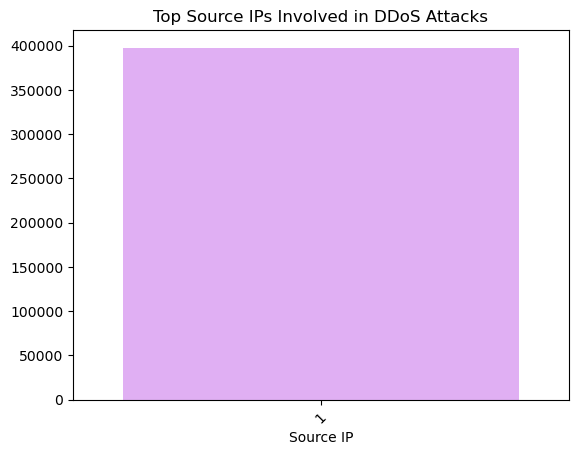

In [10]:
top_ips = df[df['target'] == 1]['Source IP'].value_counts().head(10)
sns.barplot(x=top_ips.index, y=top_ips.values, palette=['#e5a3ff'])  

plt.title('Top Source IPs Involved in DDoS Attacks')
plt.xticks(rotation=45)
plt.show()

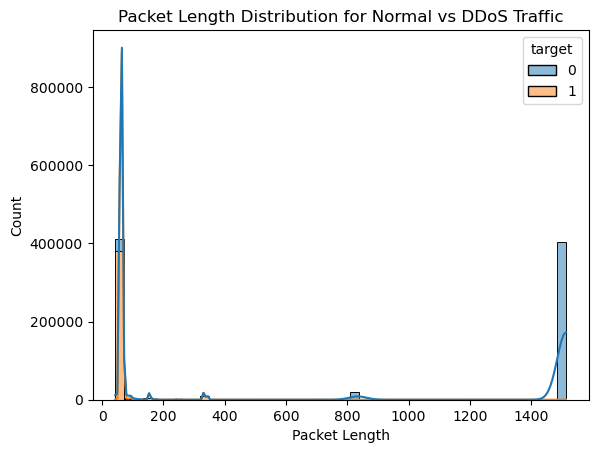

In [11]:
sns.histplot(data=df, x='Packet Length', hue='target', multiple='stack', kde=True)
plt.title('Packet Length Distribution for Normal vs DDoS Traffic')
plt.show()

In [12]:
fig = px.box(df, 
             x='target', 
             y='Packets/Time', 
             title='Packets/Time Distribution for Normal vs DDoS Traffic',
             labels={'target': 'Traffic Type', 'Packets/Time': 'Packets per Time Interval'},
             color='target',
             color_discrete_sequence=color_palette)
fig.update_layout(width=600, height=400)

fig.show(renderer='iframe')

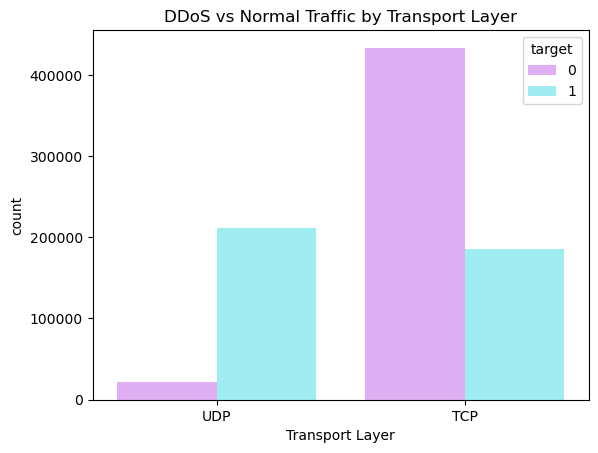

In [13]:
sns.countplot(x='Transport Layer', hue='target', data=df, palette=['#e5a3ff', '#91f8ff'])  

plt.title('DDoS vs Normal Traffic by Transport Layer')
plt.show()

In [14]:
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
   
    original_values = df[column].unique()
    
 
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    
    encoded_values = df[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")



Highest Layer Encoding and Decoding:
0 -> ARP
1 -> BOOTP
2 -> BROWSER
3 -> DATA
4 -> DHCPV6
5 -> LLMNR
6 -> NBNS
7 -> QUIC
8 -> SSDP
9 -> TCP

Transport Layer Encoding and Decoding:
1 -> UDP
0 -> TCP

Dest IP Encoding and Decoding:
5 -> 192.168.1.1
6 -> 192.168.1.10
8 -> 192.168.1.12
7 -> 192.168.1.11
4 -> 172.16.7.100
9 -> 192.168.1.2
1 -> 169.254.218.126
0 -> 169.254.198.77
11 -> 192.168.1.3
14 -> 255.255.255.255
10 -> 192.168.1.255
3 -> 172.16.255.255
2 -> 169.254.255.255
15 -> ff02::1:2
16 -> ff02::1:3
12 -> 224.0.0.252
13 -> 239.255.255.250


In [15]:
X = df.drop('target',axis = 1)
y = df['target']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
loj = LogisticRegression(solver = 'liblinear')

loj.fit(X, y)

y_pred = loj.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {linear_mse}')
print(f'R^2 Score: {linear_r2}')

Mean Squared Error: 0.006761789147123161
R^2 Score: 0.9728387198784707


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(1.0,
 array([[136355,      0],
        [     0, 119421]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    136355\n           1       1.00      1.00      1.00    119421\n\n    accuracy                           1.00    255776\n   macro avg       1.00      1.00      1.00    255776\nweighted avg       1.00      1.00      1.00    255776\n')